# Modelling

In [1]:
#conda activate tfm-electricity-prices-env
#python -m ipykernel install --user --name tfm-electricity-prices-env

In [2]:
import pandas as pd
import numpy as np
pd.options.display.max_columns = None
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
%matplotlib inline
from sklearn import metrics
import joblib
from joblib import dump, load
from pandas.plotting import register_matplotlib_converters

In [3]:
electricity_brent_weather = pd.read_csv("/home/dsc/CarpetaCompartida/TFM/electricity_brent_weather1320.csv",
                                       header= 0, dtype = str, engine= "python", sep=";", error_bad_lines= False,
                                encoding= "utf-8")
electricity_brent_weather

,Date,Energía final MWh,Mercado diario €/MWh,Mercado intradiario €/MWh,Restricciones €/MWh,Procesos OS €/MWh,Garantía potencia Pagos capacidad €/MWh,Total €/MWh,Coste s.interrrumpibilidad,Day,Precio cierre Brent,Precio apertura Brent,Precio Máximo Brent,Precio mínimo Brent,Tmax,Tmin,Tmed,Vmax,TPrec
0,2013-05-07,711755.1,45.17,-0.3,2.29,0.59,5.2,52.95,0.0,Martes,104.4,105.4,105.94,104.0,24.372623,13.598554,19.108723,17.46993,0.54821163
1,2013-05-08,706886.06,50.05,-0.48,3.03,1.13,5.23,58.96,0.0,Miércoles,104.34,104.11,104.8,103.53,24.171618,13.924416,19.068588,16.027378,0.33500755
2,2013-05-09,712014.94,51.04,-0.41,1.34,0.76,5.2,57.94,0.0,Jueves,104.47,104.44,104.6,103.45,23.007523,13.323574,18.14288,17.443392,2.0035484
3,2013-05-10,707860.44,46.06,-0.18,1.35,1.23,5.18,53.64,0.0,Viernes,103.91,104.35,104.45,101.56,22.321642,12.264773,17.353886,17.460852,0.044820618
4,2013-05-11,623204.7,46.15,-0.29,2.4,1.23,4.11,53.6,0.0,Sábado,103.91,104.35,104.45,101.56,21.945469,10.597996,16.243876,17.480986,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2780,2020-12-27,717809.2,26.71,0.0,2.04,0.35,1.87,30.97,0.0,Domingo,51.29,51.11,51.77,50.62,10.587904,-1.1632723,4.778873,25.961397,1.844361
2781,2020-12-28,801817.56,20.89,0.0,1.6,0.48,2.96,25.93,0.0,Lunes,50.86,51.25,52.02,50.53,10.993735,3.7412465,7.267571,33.766693,3.8239958
2782,2020-12-29,792248.94,39.49,0.03,2.04,0.27,3.02,44.85,0.0,Martes,51.09,51.02,51.63,50.86,10.021859,2.483079,6.3478003,23.367199,2.5908017
2783,2020-12-30,784823.4,49.69,0.02,2.52,0.34,3.07,55.63,0.0,Miércoles,51.34,51.32,51.56,51.04,9.730524,1.1381758,5.413928,18.685682,1.6149621


In [4]:
electricity_brent_weather.set_index("Date", inplace=True)

In [5]:
#Let's converts each column to the correct data type

electricity_brent_weather['Energía final MWh'] = pd.to_numeric(electricity_brent_weather['Energía final MWh'],
                                                              errors= "raise", downcast="float")

electricity_brent_weather['Mercado diario €/MWh'] = pd.to_numeric(electricity_brent_weather['Mercado diario €/MWh'],
                                                              errors= "raise", downcast="float")

electricity_brent_weather['Mercado intradiario €/MWh'] = pd.to_numeric(electricity_brent_weather['Mercado intradiario €/MWh'],
                                                              errors= "raise", downcast="float")

electricity_brent_weather['Restricciones €/MWh'] = pd.to_numeric(electricity_brent_weather['Restricciones €/MWh'],
                                                              errors= "raise", downcast="float")

electricity_brent_weather['Procesos OS €/MWh'] = pd.to_numeric(electricity_brent_weather['Procesos OS €/MWh'],
                                                              errors= "raise", downcast="float")

electricity_brent_weather['Garantía potencia Pagos capacidad €/MWh'] = pd.to_numeric(electricity_brent_weather['Garantía potencia Pagos capacidad €/MWh'],
                                                              errors= "raise", downcast="float")

electricity_brent_weather['Total €/MWh'] = pd.to_numeric(electricity_brent_weather['Total €/MWh'],
                                                              errors= "raise", downcast="float")

electricity_brent_weather['Coste s.interrrumpibilidad'] = pd.to_numeric(electricity_brent_weather['Coste s.interrrumpibilidad'],
                                                              errors= "raise", downcast="float")

electricity_brent_weather['Precio cierre Brent'] = pd.to_numeric(electricity_brent_weather['Precio cierre Brent'],
                                                              errors= "raise", downcast="float")

electricity_brent_weather['Precio apertura Brent'] = pd.to_numeric(electricity_brent_weather['Precio apertura Brent'],
                                                              errors= "raise", downcast="float")

electricity_brent_weather['Precio Máximo Brent'] = pd.to_numeric(electricity_brent_weather['Precio Máximo Brent'],
                                                              errors= "raise", downcast="float")

electricity_brent_weather['Precio mínimo Brent'] = pd.to_numeric(electricity_brent_weather['Precio mínimo Brent'],
                                                              errors= "raise", downcast="float")

electricity_brent_weather["Tmax"] = pd.to_numeric(electricity_brent_weather["Tmax"], downcast="float")
electricity_brent_weather["Tmin"] = pd.to_numeric(electricity_brent_weather["Tmin"], downcast="float")
electricity_brent_weather["Tmed"] = pd.to_numeric(electricity_brent_weather["Tmed"], downcast="float")
electricity_brent_weather["Vmax"] = pd.to_numeric(electricity_brent_weather["Vmax"], downcast="float")
electricity_brent_weather["TPrec"] = pd.to_numeric(electricity_brent_weather["TPrec"], downcast="float")

In [6]:
electricity_brent_weather

,Energía final MWh,Mercado diario €/MWh,Mercado intradiario €/MWh,Restricciones €/MWh,Procesos OS €/MWh,Garantía potencia Pagos capacidad €/MWh,Total €/MWh,Coste s.interrrumpibilidad,Day,Precio cierre Brent,Precio apertura Brent,Precio Máximo Brent,Precio mínimo Brent,Tmax,Tmin,Tmed,Vmax,TPrec
Date,,,,,,,,,,,,,,,,,,
2013-05-07,711755.1250,45.169998,-0.30,2.29,0.59,5.20,52.950001,0.0,Martes,104.400002,105.400002,105.940002,104.000000,24.372623,13.598554,19.108723,17.469931,0.548212
2013-05-08,706886.0625,50.049999,-0.48,3.03,1.13,5.23,58.959999,0.0,Miércoles,104.339996,104.110001,104.800003,103.529999,24.171618,13.924416,19.068588,16.027378,0.335008
2013-05-09,712014.9375,51.040001,-0.41,1.34,0.76,5.20,57.939999,0.0,Jueves,104.470001,104.440002,104.599998,103.449997,23.007523,13.323574,18.142879,17.443392,2.003548
2013-05-10,707860.4375,46.060001,-0.18,1.35,1.23,5.18,53.639999,0.0,Viernes,103.910004,104.349998,104.449997,101.559998,22.321642,12.264773,17.353886,17.460852,0.044821
2013-05-11,623204.6875,46.150002,-0.29,2.40,1.23,4.11,53.599998,0.0,Sábado,103.910004,104.349998,104.449997,101.559998,21.945469,10.597996,16.243876,17.480986,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-27,717809.1875,26.709999,0.00,2.04,0.35,1.87,30.969999,0.0,Domingo,51.290001,51.110001,51.770000,50.619999,10.587904,-1.163272,4.778873,25.961397,1.844361
2020-12-28,801817.5625,20.889999,0.00,1.60,0.48,2.96,25.930000,0.0,Lunes,50.860001,51.250000,52.020000,50.529999,10.993735,3.741246,7.267571,33.766693,3.823996
2020-12-29,792248.9375,39.490002,0.03,2.04,0.27,3.02,44.849998,0.0,Martes,51.090000,51.020000,51.630001,50.860001,10.021859,2.483079,6.347800,23.367199,2.590802


In [7]:
#Also and most importantly, the Date index

electricity_brent_weather.index = pd.DatetimeIndex(electricity_brent_weather.index, dayfirst= True)


In [8]:
electricity_brent_weather.index.dtype

dtype('<M8[ns]')

In [9]:
electricity_brent_weather.dtypes

Energía final MWh                          float32
Mercado diario €/MWh                       float32
Mercado intradiario €/MWh                  float32
Restricciones €/MWh                        float32
Procesos OS €/MWh                          float32
Garantía potencia Pagos capacidad €/MWh    float32
Total €/MWh                                float32
Coste s.interrrumpibilidad                 float32
Day                                         object
Precio cierre Brent                        float32
Precio apertura Brent                      float32
Precio Máximo Brent                        float32
Precio mínimo Brent                        float32
Tmax                                       float32
Tmin                                       float32
Tmed                                       float32
Vmax                                       float32
TPrec                                      float32
dtype: object

### ARIMA

Autoregressive Integrated Moving Average, or ARIMA, is a forecasting method for univariate time series data.

In statistics and econometrics, and in particular in time series analysis, an autoregressive integrated moving average (ARIMA) model is a generalization of an autoregressive moving average (ARMA) model. 

Both of these models are fitted to time series data either to better understand the data or to predict future points in the series (forecasting). 

ARIMA models are applied in some cases where data show evidence of non-stationarity in the sense of mean (but not variance/autocovariance), where an initial differencing step (corresponding to the "integrated" part of the model) can be applied one or more times to eliminate the non-stationarity of the mean function (i.e., the trend). 

When the seasonality shows in a time series, the seasonal-differencing could be applied to eliminate the seasonal component.

The parameters of the ARIMA model are defined as follows:

p: The number of lag observations included in the model, also called the lag order.

d: The number of times that the raw observations are differenced, also called the degree of differencing.

q: The size of the moving average window, also called the order of moving average.

In [10]:
#I'm going to create a DataFrame with only the variables that I'll use in the models

models_dataset = electricity_brent_weather.drop(["Day", "Coste s.interrrumpibilidad", "Mercado diario €/MWh",
                                  "Mercado intradiario €/MWh", "Restricciones €/MWh",
                                  "Procesos OS €/MWh", "Garantía potencia Pagos capacidad €/MWh", 
                                  "Precio apertura Brent", "Precio Máximo Brent",
                                  "Precio mínimo Brent"], axis = 1)

In [11]:
models_dataset

,Energía final MWh,Total €/MWh,Precio cierre Brent,Tmax,Tmin,Tmed,Vmax,TPrec
Date,,,,,,,,
2013-05-07,711755.1250,52.950001,104.400002,24.372623,13.598554,19.108723,17.469931,0.548212
2013-05-08,706886.0625,58.959999,104.339996,24.171618,13.924416,19.068588,16.027378,0.335008
2013-05-09,712014.9375,57.939999,104.470001,23.007523,13.323574,18.142879,17.443392,2.003548
2013-05-10,707860.4375,53.639999,103.910004,22.321642,12.264773,17.353886,17.460852,0.044821
2013-05-11,623204.6875,53.599998,103.910004,21.945469,10.597996,16.243876,17.480986,0.000000
...,...,...,...,...,...,...,...,...
2020-12-27,717809.1875,30.969999,51.290001,10.587904,-1.163272,4.778873,25.961397,1.844361
2020-12-28,801817.5625,25.930000,50.860001,10.993735,3.741246,7.267571,33.766693,3.823996
2020-12-29,792248.9375,44.849998,51.090000,10.021859,2.483079,6.347800,23.367199,2.590802


In [12]:
models_dataset.to_csv("models_dataset_1320.csv", sep= ";", index = True)

In [13]:
#Let's have a look at the autocorrelation of the electricity prices variable
from pandas.plotting import autocorrelation_plot

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

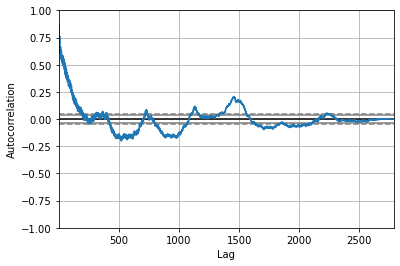

In [14]:
#There is a positive correlation aproximately in the first 250-300 lags.
#After that is almost always negative until ~1.100 lags and it gets negative/around 0 from ~ 1.600 lags
autocorrelation_plot(electricity_brent_weather["Total €/MWh"])

I'm going to start with an ARIMA model, using walk-forward validation but not really estimating or accurately choosing any of the parameters of the model. This will work as a MVP.

Walk Forward Analysis does optimization on a training set; test on a period after the set and then rolls it all forward and repeats the process. We have multiple out-of-sample periods and look at these results combined.

After that, I'll check the model and will start modifying it until I think is optimal. To do this, I'll use the auto-arima function to optimise the ARIMA parameters.

I think the most important thing to notice here is that ARIMA works for univariate time series, so I will only use the electricity price to predict itself.

Also, ARIMA does not work well with seasonal data, so let's firstly check if the electricity prices are stationay or not. I will use a Dickey-Fuller test to do that.

### Checking normality in the time series / Checking Stationary in the time series - Dickey-Fuller test


Let's check if the electricity prices follow a normal distribution:

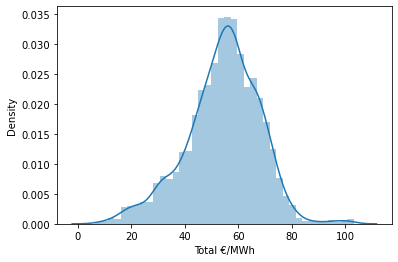

In [15]:
sns.distplot(models_dataset["Total €/MWh"]);

In [16]:
from scipy.stats import normaltest
k2, p = normaltest(models_dataset["Total €/MWh"])

alpha = 0.05
print("p = {:g}".format(p))

if p < alpha:  # null hypothesis: electricity prices comes from a normal distribution
    print("The null hypothesis can be rejected")
else:
    print("The null hypothesis cannot be rejected")

p = 1.82455e-18
The null hypothesis can be rejected


Looking at the plot, it might looks like the prices follow a normal distribution, maybe with a longer right tail. However, if I test it, the electricity prices do not follow a normal distribution.

I will have to normalise the values before I do an ARIMA model, as this work best with data that follows a normal distribution.

In [17]:
electricity_price = pd.DataFrame(models_dataset["Total €/MWh"])

In [18]:
electricity_price

,Total €/MWh
Date,
2013-05-07,52.950001
2013-05-08,58.959999
2013-05-09,57.939999
2013-05-10,53.639999
2013-05-11,53.599998
...,...
2020-12-27,30.969999
2020-12-28,25.930000
2020-12-29,44.849998


To test for stationarity, I'm going to use a Dickey-Fuller test:

In [19]:
from statsmodels.tsa.stattools import adfuller

y = electricity_price.values
result = adfuller(y)
print('Dickey-Fuller Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

Dickey-Fuller Statistic: -3.780973
p-value: 0.003108
Critical Values:
	1%: -3.433
	5%: -2.863
	10%: -2.567


Looking at the ADF Statistic, it is likely to reject the null hypothesis and that means the electricity prices are stationary and do not depend on time.

In this case, the null hypothesis can be rejected with a significance level of less than 1% (the Dickey-Fuller statistic is lower than the critical value at 1% treeshold). 

That means, I can use an ARIMA model to forecast the electricity prices.

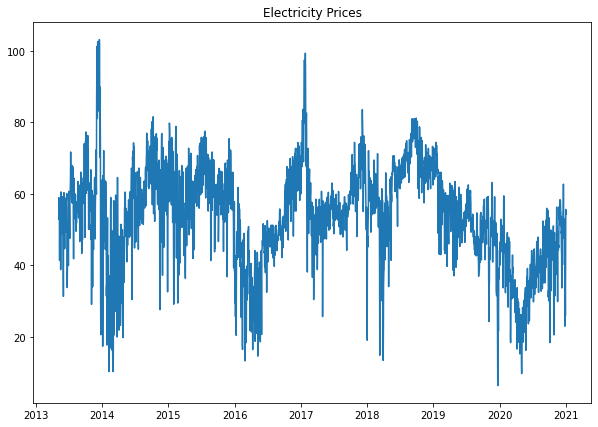

In [20]:
fig, axes = plt.subplots(figsize=(10,7))
plt.plot(electricity_price.index, electricity_price.values);
plt.title('Electricity Prices');

Let's now see if the Brent oil crude futures prices are stationary or not, just to get more information on my dataset.

In [21]:
brent_prices = models_dataset["Precio cierre Brent"]

Dickey-Fuller Statistic: -1.711204
p-value: 0.425350
Critical Values:
	1%: -3.433
	5%: -2.863
	10%: -2.567


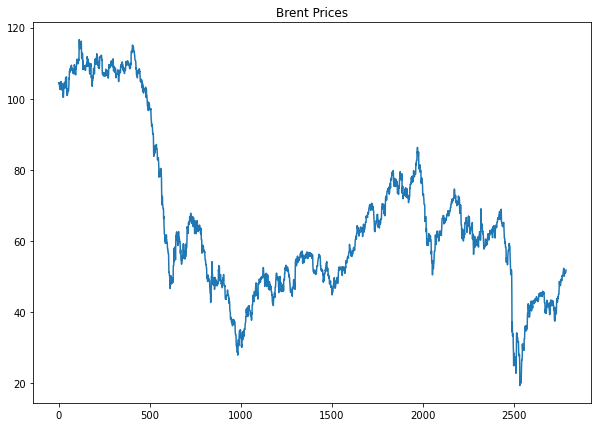

In [22]:
y = brent_prices.values
result = adfuller(y)
print('Dickey-Fuller Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))
    
fig, axes = plt.subplots(figsize=(10,7))
plt.plot(y);
plt.title('Brent Prices');

In this case, the null hypothesis cannot be rejected and therefore, the Brent prices are not stationary. That means, they are influenced by the time.

### Walk-forward validation ARIMA

Not optimising any parameter or normalising the data (MPV):

Test RMSE: 4.937
Test MAE: 24.379


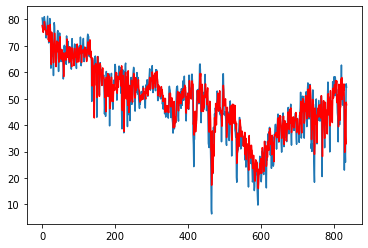

CPU times: user 26min 52s, sys: 8.15 s, total: 27min 1s
Wall time: 39min 48s


In [23]:
%%time
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt

# splitting into train and test sets

y = electricity_price.values

size = int(len(y) * 0.70) #Train size will be 70% of the dataset

train, test = y[0:size], y[size:len(y)]

history = [y for y in train]

predictions = list()

# walk-forward validation

for t in range(len(test)):
    model = ARIMA(history, order=(10,0,0))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    
# evaluate forecasts

rmse = mean_squared_error(test, predictions, squared= False)
mae = mean_squared_error(test, predictions)
print('Test RMSE: %.3f' % rmse)
print('Test MAE: %.3f' % mae)

#plotting forecasts against actual outcomes
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()


Looking at the plot above, it looks like the model is working quite well. This is also supported by a RMSE of 4.937
, which means the predictions can vary in less than 5 euros from reality. Looking at the distribution of residuals below, I can see they're around 0, and the mean of residuals is almost 0. 

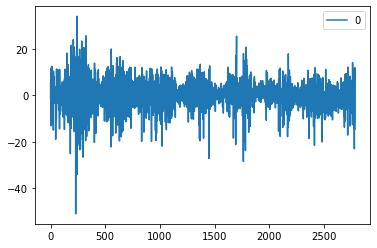

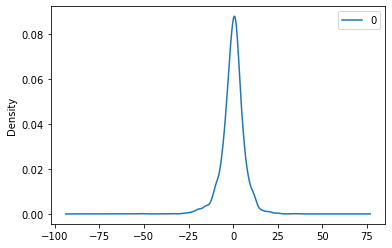

                 0
count  2784.000000
mean     -0.009452
std       6.133139
min     -51.144501
25%      -2.918392
50%       0.324544
75%       3.169558
max      34.116905


In [24]:
# line plot of residuals

residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
plt.show()

# density plot of residuals

residuals.plot(kind='kde')
plt.show()

# summary stats of residuals

print(residuals.describe())

In [25]:
from statsmodels.tsa.arima_model import ARIMAResults

#I'm going to save this model so I can load it at any other poin on time if needed

model_fit.save("ARIMA.pkl")

#To load the model, I would need to use the following code:

loaded_ARIMA = ARIMAResults.load("ARIMA.pkl")

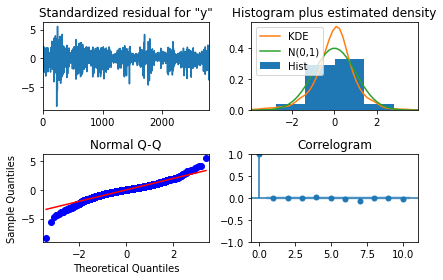

In [26]:
loaded_ARIMA.plot_diagnostics();
plt.tight_layout()

In [27]:
loaded_ARIMA.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 2784
Model:                ARIMA(10, 0, 0)   Log Likelihood               -8999.958
Date:                Sat, 18 Dec 2021   AIC                          18023.916
Time:                        13:11:48   BIC                          18095.096
Sample:                             0   HQIC                         18049.617
                               - 2784                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         54.2398      2.255     24.051      0.000      49.820      58.660
ar.L1          0.7651      0.013     58.755      0.000       0.740       0.791
ar.L2         -0.1904      0.019    -10.257      0.000      -0.227      -0.154
ar.L3          0.1301      0.018      7.421      0.000       0.096       0.164
ar.L4          0.0546      0.017      3.230      0.001       0.021       0.088
ar.L5         -0.0273      0.018     -1.546      0.122      -0.062       0.007
ar.L6          0.0763      0.018      4.356      0.000       0.042       0.111
ar.L7          0.3529      0.018     20.137      0.000       0.319       0.387
ar.L8         -0.2428      0.018    -13.256      0.000      -0.279      -0.207
ar.L9          0.0591      0.020      2.909      0.004       0.019       0.099
ar.L10        -0.0331      0.015     -2.214      0.027      -0.062      -0.004
sigma2        37.5837      0.624     60.260      0.000      36.361      38.806
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              2282.56
Prob(Q):                              1.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.37   Skew:                            -0.55
Prob(H) (two-sided):                  0.00   Kurtosis:                         7.30
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [28]:
print('Observations: %d' % (len(y)))
print('Training Observations: %d' % (len(train)))
print('Testing Observations: %d' % (len(test)))

Observations: 2785
Training Observations: 1949
Testing Observations: 836


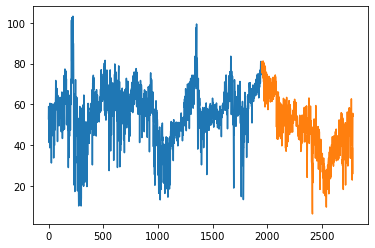

In [29]:
#This show us in a plot the 2785 observations divided by train (in blue, 1949) and test (in orange, 836)
pd.plotting.register_matplotlib_converters()
plt.plot(train)
plt.plot([None for i in train] + [y for y in test])
plt.show()

In [30]:
#import sys
#print(sys.executable)
#!conda info
#!conda list

### Testing for normality - Normalisation and standarisation

In [31]:
y = electricity_price.values

size = int(len(y) * 0.70) #Train size will be 70% of the dataset

train, test = y[0:size], y[size:len(y)]

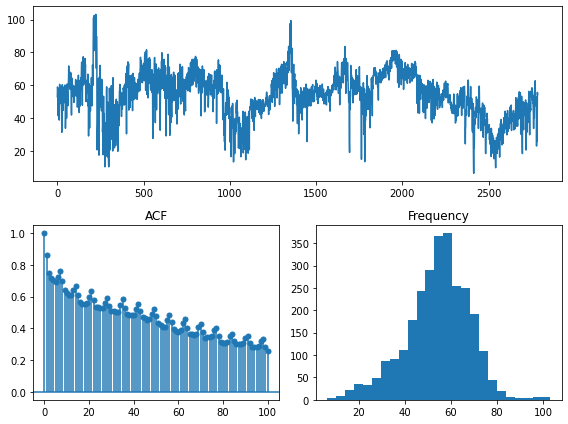

In [32]:
from pmdarima.utils import tsdisplay

tsdisplay(y, lag_max = 100)

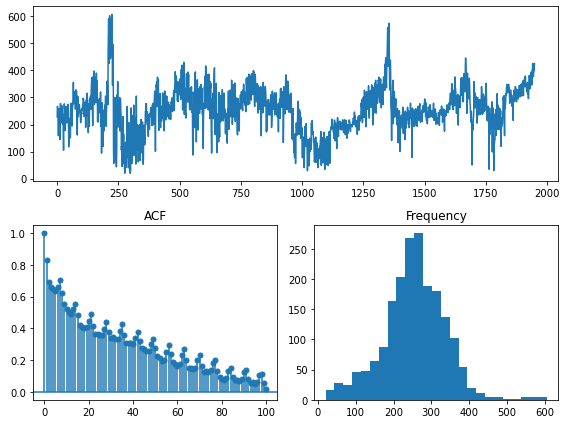

In [33]:
#Box-Cox Transformation

from pmdarima.preprocessing import BoxCoxEndogTransformer

train_bc, _ = BoxCoxEndogTransformer(lmbda2=1e-6).fit_transform(train)

tsdisplay(train_bc, lag_max= 100)

In [34]:
k2, p = normaltest(train_bc)

alpha = 0.05
print("p = {:g}".format(p))

if p < alpha:  # null hypothesis: electricity prices comes from a normal distribution
    print("The null hypothesis can be rejected")
else:
    print("The null hypothesis cannot be rejected")

p = 1.15861e-13
The null hypothesis can be rejected


The Box-Cox transformation do not seem to work with my data (it does not transform it so it follows a normal distribution). Therefore, I'm going to try a MinMaxScaler from scikit-learn:

Min: 10.270000, Max: 103.209999
---------
[0.45922095]
[0.5238863]
[0.5129115]
[0.46664512]
[0.46621472]
---------
[52.949997]
[58.96]
[57.94]
[53.640003]
[53.6]


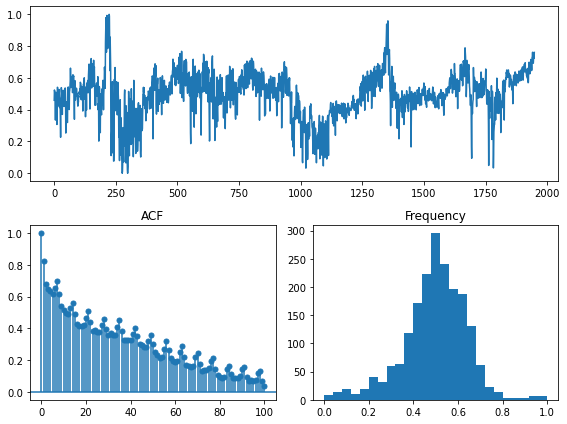

In [35]:
#Min-Max scaler

from sklearn.preprocessing import MinMaxScaler

# train the normalization

scaler = MinMaxScaler(feature_range=(0, 1))
scaler = scaler.fit(train)
print('Min: %f, Max: %f' % (scaler.data_min_, scaler.data_max_))

print("---------")

# normalise the train dataset and print the first 5 rows

normalised = scaler.transform(train)
for i in range(5):
    print(normalised[i])

print("---------")    
# inverse transform and print the first 5 rows

inversed = scaler.inverse_transform(normalised)
for i in range(5):
    print(inversed[i])
    
tsdisplay(normalised, lag_max= 100)

In [36]:
k2, p = normaltest(normalised)

alpha = 0.05

print(p)

if p < alpha:  # null hypothesis: electricity prices comes from a normal distribution
    print("The null hypothesis can be rejected")
else:
    print("The null hypothesis cannot be rejected")

[8.65746612e-27]
The null hypothesis can be rejected


The Min-Max scaler also doesn't change the distribution of my data, only the range of the values (between 0 and 1). This might be interesting when using a model with different variables that have different value ranges.

A Standar Scaler (used below) also do not seem to help to transform the electricity prices to follow a Gaussian distribution.

In [37]:
#Standard Scaler

from sklearn.preprocessing import StandardScaler

# train the standardisation

scaler = StandardScaler()
scaler = scaler.fit(train)
print('Mean: %f, Standard Deviation: %f' % (scaler.mean_, sqrt(scaler.var_)))

# standarise the train dataset and print the first 5 rows

normalised = scaler.transform(train)
for i in range(5):
    print(normalised[i])
# inverse transform and print the first 5 rows

inversed = scaler.inverse_transform(normalised)
for i in range(5):
    print(inversed[i])

Mean: 56.514300, Standard Deviation: 13.171921
[-0.27059826]
[0.18567523]
[0.10823775]
[-0.21821421]
[-0.22125104]
[52.95]
[58.96]
[57.94]
[53.64]
[53.6]


In [38]:
k2, p = normaltest(normalised)

alpha = 0.05

print(p)

if p < alpha:  # null hypothesis: electricity prices comes from a normal distribution
    print("The null hypothesis can be rejected")
else:
    print("The null hypothesis cannot be rejected")

[8.65687168e-27]
The null hypothesis can be rejected


In [39]:
#!conda search --channel conda-forge fitter
#pip install fitter

In [40]:
from fitter import Fitter, get_common_distributions, get_distributions

,sumsquare_error,aic,bic,kl_div
burr,0.000623,1121.152995,-42613.143025,inf
norm,0.001000,1123.310003,-41312.011575,inf
gamma,0.001381,1112.758358,-40406.849268,inf


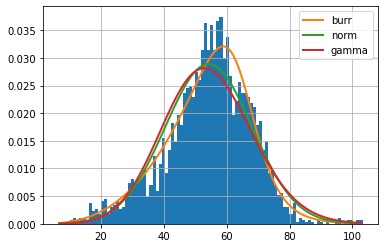

In [41]:
f = Fitter(y,distributions=["gamma","burr","norm"])
f.fit()
f.summary()

In [42]:
f.get_best(method = 'sumsquare_error')

{'burr': {'c': 13.894075517176073,
  'd': 0.26561995424717144,
  'loc': -0.27495882754038525,
  'scale': 66.89209472929053}}

So it seems that electricity prices follow a Burr distribution. However, looking at the sum square error, aic and bic values from the normal distribution and comparing those to the burr distribution, and also looking at the shape of the histogram, I'm going to assume that the electricity prices are Gaussian-like for the purpose of this project.

### Checking Seasonality and Trend

In [43]:
from statsmodels.tsa.seasonal import seasonal_decompose
def decomposition_plot(ts):
    
# Apply seasonal_decompose 
    
    decomposition = seasonal_decompose(x = ts, model = "additive",
                                          period= int(len(ts)/2))
    
# Get trend, seasonality, and residuals
    trend = decomposition.trend
    seasonal = decomposition.seasonal
    residual = decomposition.resid

# Plotting
    plt.figure(figsize=(12,8))
    plt.subplot(411)
    plt.plot(np.log(ts), label='Original', color='blue')
    plt.legend(loc='best')
    plt.subplot(412)
    plt.plot(trend, label='Trend', color='red')
    plt.legend(loc='best')
    plt.subplot(413)
    plt.plot(seasonal,label='Seasonality', color='orange')
    plt.legend(loc='best')
    plt.subplot(414)
    plt.plot(residual, label='Residuals', color='green')
    plt.legend(loc='best')
    plt.tight_layout()

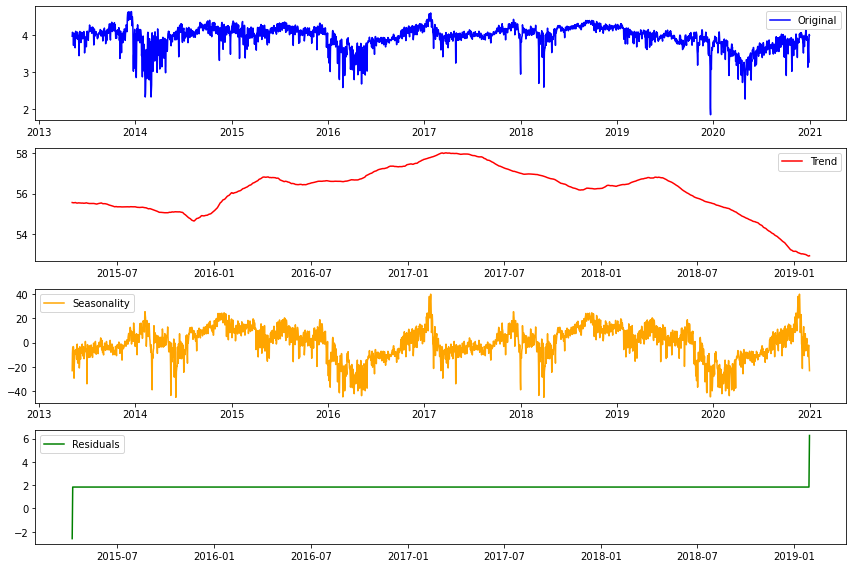

In [44]:
decomposition_plot(electricity_price)

From the plots above, it looks like the electricity prices time series do not follow a particular trend and also, are not seasonal.

### Checking autocorrelation

In [45]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from matplotlib.ticker import MaxNLocator

def plot_acf_pacf(ts, figsize=(15,8),lags=1000):
    
    fig,ax = plt.subplots(nrows=3, figsize=figsize)
    
    # Plot time series
    ts.plot(ax=ax[0])
    
    # Plot acf, pavf
    plot_acf(ts, ax=ax[1], lags=lags)
    plot_pacf(ts, ax=ax[2], lags=lags) 
    fig.tight_layout()
    
    for a in ax[1:]:
        a.xaxis.set_major_locator(MaxNLocator(min_n_ticks=lags, integer=True))
        a.xaxis.grid()
    return fig,ax

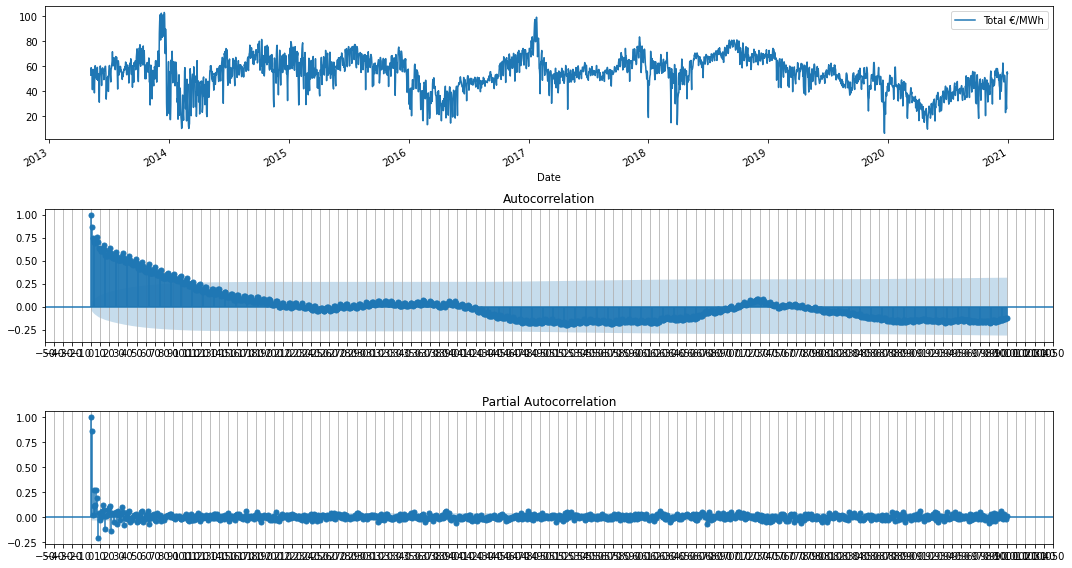

In [46]:
plot_acf_pacf(electricity_price);
plt.tight_layout()

The autocorrelation plots above also confirm that there is no seasonality or trend in the electricity prices.

### Findings
A summary of all the findings related to electricity prices:

- They do not follow a normal distribution, but the distribution is Gaussian-like, so I will assume they are "normal".
- They are not seasonal.
- They are stationary.
- They don't follow a particular trend.

### Auto-ARIMA

Now, I'm going to improve the ARIMA model, changing its parameters so I'm using the optimal order for the model.

In [47]:
%%time
from pmdarima import auto_arima

y = electricity_price.values

model_auto_ARIMA = auto_arima(y, start_p= 1, start_q= 1, stationary= True, seasonal = False,
                             stepwise= True, error_action= "trace", suppress_warnings= True)

CPU times: user 51.8 s, sys: 117 ms, total: 51.9 s
Wall time: 1min 17s


In [48]:
model_auto_ARIMA

ARIMA(order=(5, 0, 5), scoring_args={}, suppress_warnings=True)

### Walk-forward validation ARIMA

ARIMA(order=(5, 0, 5))

Test RMSE: 4.869
Test MAE: 23.711


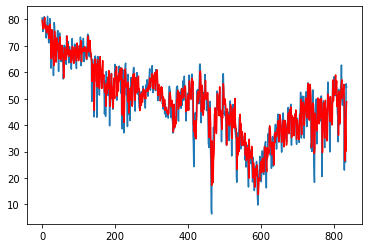

CPU times: user 59min 1s, sys: 7.57 s, total: 59min 8s
Wall time: 1h 12min 5s


In [49]:
%%time
warnings.filterwarnings("ignore")
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt

# splitting into train and test sets

y = electricity_price.values

size = int(len(y) * 0.70) #Train size will be 70% of the dataset

train, test = y[0:size], y[size:len(y)]

history = [y for y in train]

predictions = list()

# walk-forward validation

for t in range(len(test)):
    model = ARIMA(history, order=(5,0,5))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    
# evaluate forecasts

rmse = mean_squared_error(test, predictions, squared= False)
mae = mean_squared_error(test, predictions)
print('Test RMSE: %.3f' % rmse)
print('Test MAE: %.3f' % mae)

# plotting forecasts against actual outcomes
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()


In [50]:
#I'm going to save this model so I can load it at any other poin on time if needed

model_fit.save("optimisedARIMA.pkl")

#To load the model, I would need to use the following code:

#loaded_ARIMA = ARIMAResults.load("optimisedARIMA.pkl")

The above ARIMA model works better than the first one, with a RMSE of 4.869 euros.

Still, I'm only using the past electricity prices to forecast.

Now, I'm going to use different models that take into account other variables of my dataset.

### Vector Auto Regression (VAR)

In a VAR model, each variable is a linear function of the past values of itself and the past values of all the other variables.

The ADF test enables one to test for cointegration between two-time series. The Johansen Test can be used to check for cointegration between a maximum of 12-time series.

I'm firstly going to delete the mean temperature from my models_dataset, because I don't think it's relevant when I also have the maximum and minumum temperature.

In [18]:
models_dataset.drop("Tmed", axis = 1, inplace= True)

In [19]:
#Checking stationarity using the Coint Johansen Test instead of ADF.

from statsmodels.tsa.vector_ar.vecm import coint_johansen

coint_johansen(models_dataset,0,1).eig

array([0.27921953, 0.20051104, 0.1644895 , 0.12065111, 0.03864947,
       0.01288254, 0.00104485])

In [20]:
from statsmodels.tsa.vector_ar.vecm import select_coint_rank
cointegration_rank = select_coint_rank(models_dataset,0,1)
print(cointegration_rank)

Johansen cointegration test using trace test statistic with 5% significance level
r_0 r_1 test statistic critical value
-------------------------------------
  0   7          2541.          125.6
  1   7          1629.          95.75
  2   7          1007.          69.82
  3   7          506.5          47.85
  4   7          148.7          29.80
  5   7          38.99          15.49
  6   7          2.909          3.841
-------------------------------------


The test statistics are higher than the critical values for all variables(series), apart from one. This means the null hypotesis can be rejected at a 95% confidence level, apart from one variable.

The null hypotesis was that the variables are not cointegrated, so rejecting the null hypotesis means that the variables (series) are cointegrated.

No handles with labels found to put in legend.


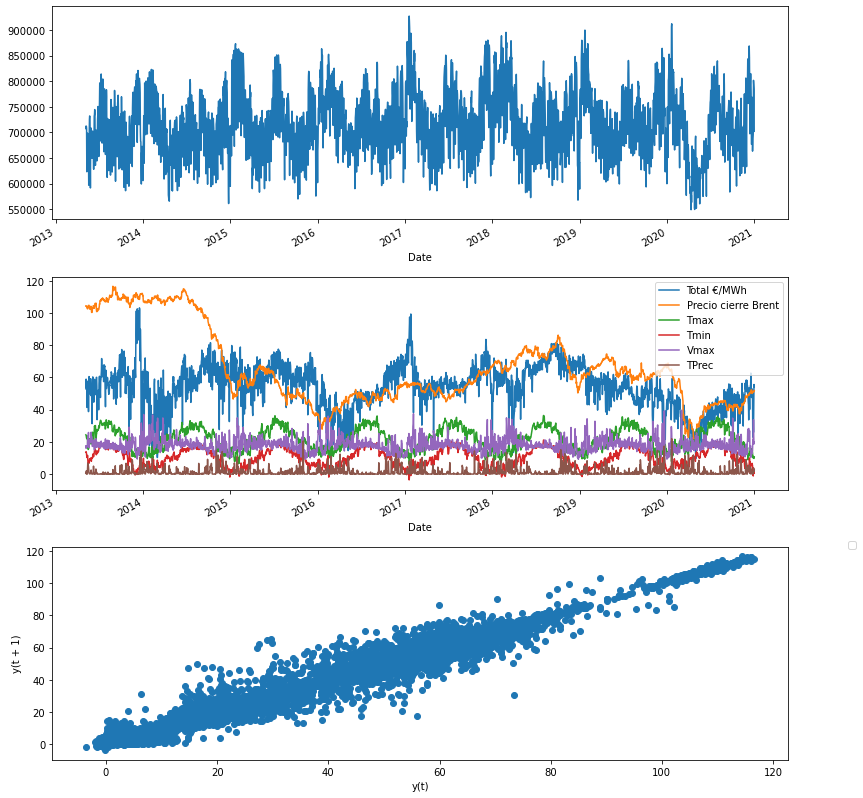

In [21]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows=3, ncols=1, figsize=(12,11))

#series plot

models_dataset["Energía final MWh"].plot(ax = ax1)

models_dataset.drop("Energía final MWh", axis = 1).plot(ax = ax2)

plt.legend(bbox_to_anchor=(1.1, 1.05), loc="upper right")

plt.tight_layout()

#lag plot
pd.plotting.lag_plot(models_dataset.drop("Energía final MWh", axis = 1))
plt.show()

The plot above shows some relationships among the series,showing also some outliers.

The linear shape of the lag plot indicates the presence of positive auto-correlation. 

In [22]:
#Adding the period to the index, otherwise I get a warning saying the date won't be taken into consideration when forecasting
models_dataset.index = pd.DatetimeIndex(models_dataset.index, dayfirst= True).to_period("D")

In [23]:
#creating the train and validation set

train = models_dataset[:int(0.7*(len(models_dataset)))]
test = models_dataset[int(0.7*(len(models_dataset))):]

#fitting the model

from statsmodels.tsa.vector_ar.var_model import VAR

model_VAR = VAR(endog=train)
model_fit_VAR = model_VAR.fit()

#predictions on validation

prediction_VAR = model_fit_VAR.forecast(model_fit_VAR.y, steps=len(test))
prediction_VAR

array([[7.35888207e+05, 7.70506263e+01, 7.96938557e+01, ...,
        1.70784185e+01, 1.58929158e+01, 8.97667619e-01],
       [7.27632488e+05, 7.39281892e+01, 7.96450843e+01, ...,
        1.67649650e+01, 1.63498682e+01, 9.37749436e-01],
       [7.22515373e+05, 7.14096783e+01, 7.95956561e+01, ...,
        1.64948624e+01, 1.67026869e+01, 9.44453390e-01],
       ...,
       [7.29406745e+05, 5.64762653e+01, 6.65524847e+01, ...,
        1.03930645e+01, 1.82211198e+01, 1.25034906e+00],
       [7.29410546e+05, 5.64758856e+01, 6.65437727e+01, ...,
        1.03928117e+01, 1.82210408e+01, 1.25037093e+00],
       [7.29414342e+05, 5.64755064e+01, 6.65350715e+01, ...,
        1.03925592e+01, 1.82209619e+01, 1.25039277e+00]])

The array above shows the predictions, where each list represents the predictions of each row.
Let's show this in a more understandable way:

In [25]:
#transforming the predictions into a Dataframe

cols = models_dataset.columns

pred = pd.DataFrame(index= test.index,columns=cols)

for j in range(0,7):
    for i in range(0, len(prediction_VAR)):
       pred.iloc[i][j] = prediction_VAR[i][j]

pred

,Energía final MWh,Total €/MWh,Precio cierre Brent,Tmax,Tmin,Vmax,TPrec
Date,,,,,,,
2018-09-13,735888,77.0506,79.6939,28.6945,17.0784,15.8929,0.897668
2018-09-14,727632,73.9282,79.6451,28.4965,16.765,16.3499,0.937749
2018-09-15,722515,71.4097,79.5957,28.2994,16.4949,16.7027,0.944453
2018-09-16,719362,69.3556,79.5469,28.1072,16.2535,16.9753,0.941438
2018-09-17,717448,67.6613,79.4996,27.9215,16.0339,17.1882,0.936243
...,...,...,...,...,...,...,...
2020-12-27,729399,56.477,66.5699,21.6706,10.3936,18.2213,1.25031
2020-12-28,729403,56.4766,66.5612,21.6703,10.3933,18.2212,1.25033
2020-12-29,729407,56.4763,66.5525,21.6701,10.3931,18.2211,1.25035


In [26]:
pred.dtypes

Energía final MWh      object
Total €/MWh            object
Precio cierre Brent    object
Tmax                   object
Tmin                   object
Vmax                   object
TPrec                  object
dtype: object

In [27]:
type(pred)

pandas.core.frame.DataFrame

In [28]:
#Let's converts each column to the correct data type

pred['Total €/MWh'] = pred[['Total €/MWh']].apply(pd.to_numeric, downcast="float", errors= "coerce")
pred['Precio cierre Brent'] = pred[['Precio cierre Brent']].apply(pd.to_numeric, downcast="float", errors= "coerce")
pred["Tmax"] = pred[["Tmax"]].apply(pd.to_numeric, downcast="float", errors= "coerce")
pred["Tmin"] = pred[["Tmin"]].apply(pd.to_numeric, downcast="float", errors= "coerce")
pred["Vmax"] = pred[["Vmax"]].apply(pd.to_numeric, downcast="float", errors= "coerce")
pred["TPrec"] = pred[["TPrec"]].apply(pd.to_numeric, downcast="float", errors= "coerce")

In [29]:
pred.dtypes

Energía final MWh       object
Total €/MWh            float32
Precio cierre Brent    float32
Tmax                   float32
Tmin                   float32
Vmax                   float32
TPrec                  float32
dtype: object

In [30]:
from sklearn.metrics import mean_squared_error
from math import sqrt

#Checking the Root Mean Square Error

for i in cols:
    print('RMSE for', i, 'is : ', sqrt(mean_squared_error(pred[i], test[i])))

RMSE for Energía final MWh is :  68330.93197906548
RMSE for Total €/MWh is :  15.501654751955616
RMSE for Precio cierre Brent is :  19.597178571390945
RMSE for Tmax is :  6.807697248063332
RMSE for Tmin is :  5.416030063878157
RMSE for Vmax is :  4.275937982464527
RMSE for TPrec is :  2.5196038287450877


In [31]:
#I'm going to save this model so I can load it at any other poin on time if needed

dump(model_fit_VAR, open("model_VAR.pkl", "wb"))

#To load the model, I would need to use the following code:

VAR_loaded = load(open("model_VAR.pkl", "rb"))

In [32]:
VAR_loaded.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Sun, 19, Dec, 2021
Time:                     13:58:07
--------------------------------------------------------------------
No. of Equations:         7.00000    BIC:                    28.6697
Nobs:                     1948.00    HQIC:                   28.5683
Log likelihood:          -47060.8    FPE:                2.40705e+12
AIC:                      28.5094    Det(Omega_mle):     2.33898e+12
--------------------------------------------------------------------
Results for equation Energía final MWh
                            coefficient       std. error           t-stat            prob
-----------------------------------------------------------------------------------------
const                     237973.055694     15879.644298           14.986           0.000
L1.Energía final MWh           0.652042         0.019827           32.887           0.000
L1.Total €/M

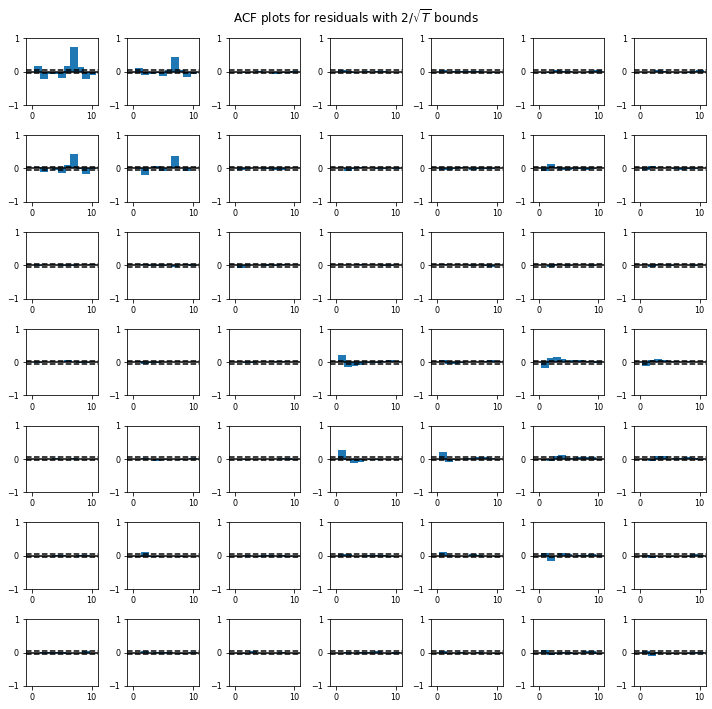

In [33]:
VAR_loaded.plot_acorr();
plt.tight_layout()

In [34]:
VAR_loaded.stderr

,Energía final MWh,Total €/MWh,Precio cierre Brent,Tmax,Tmin,Vmax,TPrec
const,15879.644298,2.534806,3.338192e-01,5.301905e-01,4.042449e-01,1.009694,6.188889e-01
L1.Energía final MWh,0.019827,0.000003,4.167936e-07,6.619751e-07,5.047244e-07,0.000001,7.727204e-07
L1.Total €/MWh,112.644670,0.017981,2.367997e-03,3.760987e-03,2.867573e-03,0.007162,4.390182e-03
L1.Precio cierre Brent,44.477461,0.007100,9.349978e-04,1.485016e-03,1.132254e-03,0.002828,1.733452e-03
L1.Tmax,596.586792,0.095231,1.254135e-02,1.991887e-02,1.518719e-02,0.037933,2.325121e-02
L1.Tmin,705.250913,0.112576,1.482567e-02,2.354696e-02,1.795343e-02,0.044843,2.748625e-02
L1.Vmax,398.528949,0.063616,8.377809e-03,1.330611e-02,1.014527e-02,0.025340,1.553216e-02
L1.TPrec,676.978502,0.108063,1.423133e-02,2.260300e-02,1.723371e-02,0.043045,2.638437e-02


In [35]:
#predictions for 2 day ahead

model_VAR = VAR(endog=models_dataset)
model_fit_VAR = model_VAR.fit()
yhat = model_fit_VAR.forecast(model_fit_VAR.y, steps=2)
print(yhat)

[[7.20893719e+05 5.53270823e+01 5.17816295e+01 1.05620159e+01
  8.13496735e-01 1.93347429e+01 2.27392200e+00]
 [7.32446275e+05 5.57794568e+01 5.17671226e+01 1.06447589e+01
  1.03927394e+00 1.88700422e+01 2.23808355e+00]]


In [36]:
#transforming the predictions into a Dataframe

cols = models_dataset.columns

index = pd.date_range("2021-01-01", periods = 2, freq = "D")

forecast_VAR = pd.DataFrame(index= index,columns=cols)

for j in range(0,7):
    for i in range(0, len(yhat)):
       forecast_VAR.iloc[i][j] = yhat[i][j]

forecast_VAR

,Energía final MWh,Total €/MWh,Precio cierre Brent,Tmax,Tmin,Vmax,TPrec
2021-01-01,720894,55.3271,51.7816,10.562,0.813497,19.3347,2.27392
2021-01-02,732446,55.7795,51.7671,10.6448,1.03927,18.87,2.23808


Let's now compare this forecast with that it actually happened in the first 2 days of January of 2021:

In [41]:
electricity_prices_jan_2021 = pd.read_excel("/home/dsc/CarpetaCompartida/TFM/Data/Precios de la electricidad/Provisionales_2021/PFMDIASM_TOD_202101.1/PFMDIASM_TOD_20210101_20210131.xls",
                                            dtype= str,parse_dates= True, engine= None, header = 3, usecols= ["Periodo","Total\n€/MWh"])
electricity_prices_jan_2021.head(2)

,Periodo,Total\n€/MWh
0,01/01/21 Viernes,47.85
1,02/01/21 Sábado,53.65


In [38]:
historical_brent = pd.read_csv("/home/dsc/CarpetaCompartida/TFM/historic_brent_prices.csv", dtype= str, sep= ";",
                               usecols= ["Date", "Último", "Apertura", "Máximo", "Mínimo"])

historical_brent["Date"] = pd.to_datetime(historical_brent["Date"], dayfirst=True)

In [39]:
days = pd.DataFrame(index = pd.date_range("2013-01-02", periods = 3118, freq = "D")).rename_axis("Date")

historical_brent_prices_allweek = pd.merge(days, historical_brent, on= "Date", indicator = True, how= "left")

#I'm going to use Friday's price for the weekend (as this is the latest price) and the previous day's price for the bank holidays
historical_brent_prices_allweek = historical_brent_prices_allweek.fillna(method= "ffill")
historical_brent_prices_allweek.set_index("Date", inplace= True)

In [40]:
historical_brent_prices_allweek.loc["2021-01-01":"2021-01-02"]

,Último,Apertura,Máximo,Mínimo,_merge
Date,,,,,
2021-01-01,"51,80","51,49","51,84","50,90",left_only
2021-01-02,"51,80","51,49","51,84","50,90",left_only


I think the model doesn't work too bad with short-term predictions.